In [4]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [2]:
bad_songs = pd.read_csv('datasets/bad_cleaned.csv')
bad_songs.head()

,lyrics
0,I mix the 4Hunnid with the designer Stay lace...
1,I came to rule this stage with that Budden swa...
2,Gorillaz - Song Machine Episode 7 - 4/4 mxmto...
3,"Learning is, indeed, a very great and a very..."
4,"Young nigga eatin', uh, bon appetit, uh Messe..."


In [3]:
good_songs = pd.read_csv('datasets/good_cleaned.csv')
good_songs = good_songs[['lyrics']].copy()
good_songs


,lyrics
0,sam the sham miscellaneous wooly bully wooly b...
1,sugar pie honey bunch you know that i love yo...
2,when i woke up this morning you were on my mi...
3,you never close your eyes anymore when i kiss...
4,when youre alone and life is making you lonel...
...,...
4861,my face above the water my feet cant touch th...
4862,enrique iglesias dime si es verdad me dijeron ...
4863,going out tonight changes into something red ...
4864,oh man oh man oh man not againyeah i learned ...


In [5]:

# Combine the two dataframes into one
main = pd.concat([good_songs, bad_songs], ignore_index=True)

# Create a new column 'label' with 1 for good songs and 0 for bad songs
main['label'] = (main['lyrics'].isin(good_songs['lyrics'])) * 1

# Replace missing values with an empty string
main['lyrics'].fillna('', inplace=True)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(main['lyrics'], main['label'], test_size=0.2, random_state=42)

# Convert the text data into a numerical representation using bag-of-words
vect = CountVectorizer().fit(X_train)
X_train_bow = vect.transform(X_train)
X_test_bow = vect.transform(X_test)

# Create a decision tree classifier
tree = DecisionTreeClassifier()

# Train the decision tree classifier
tree.fit(X_train_bow, y_train)

# Predict the labels for the test set
y_pred = tree.predict(X_test_bow)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}".format(accuracy))

Accuracy: 0.99


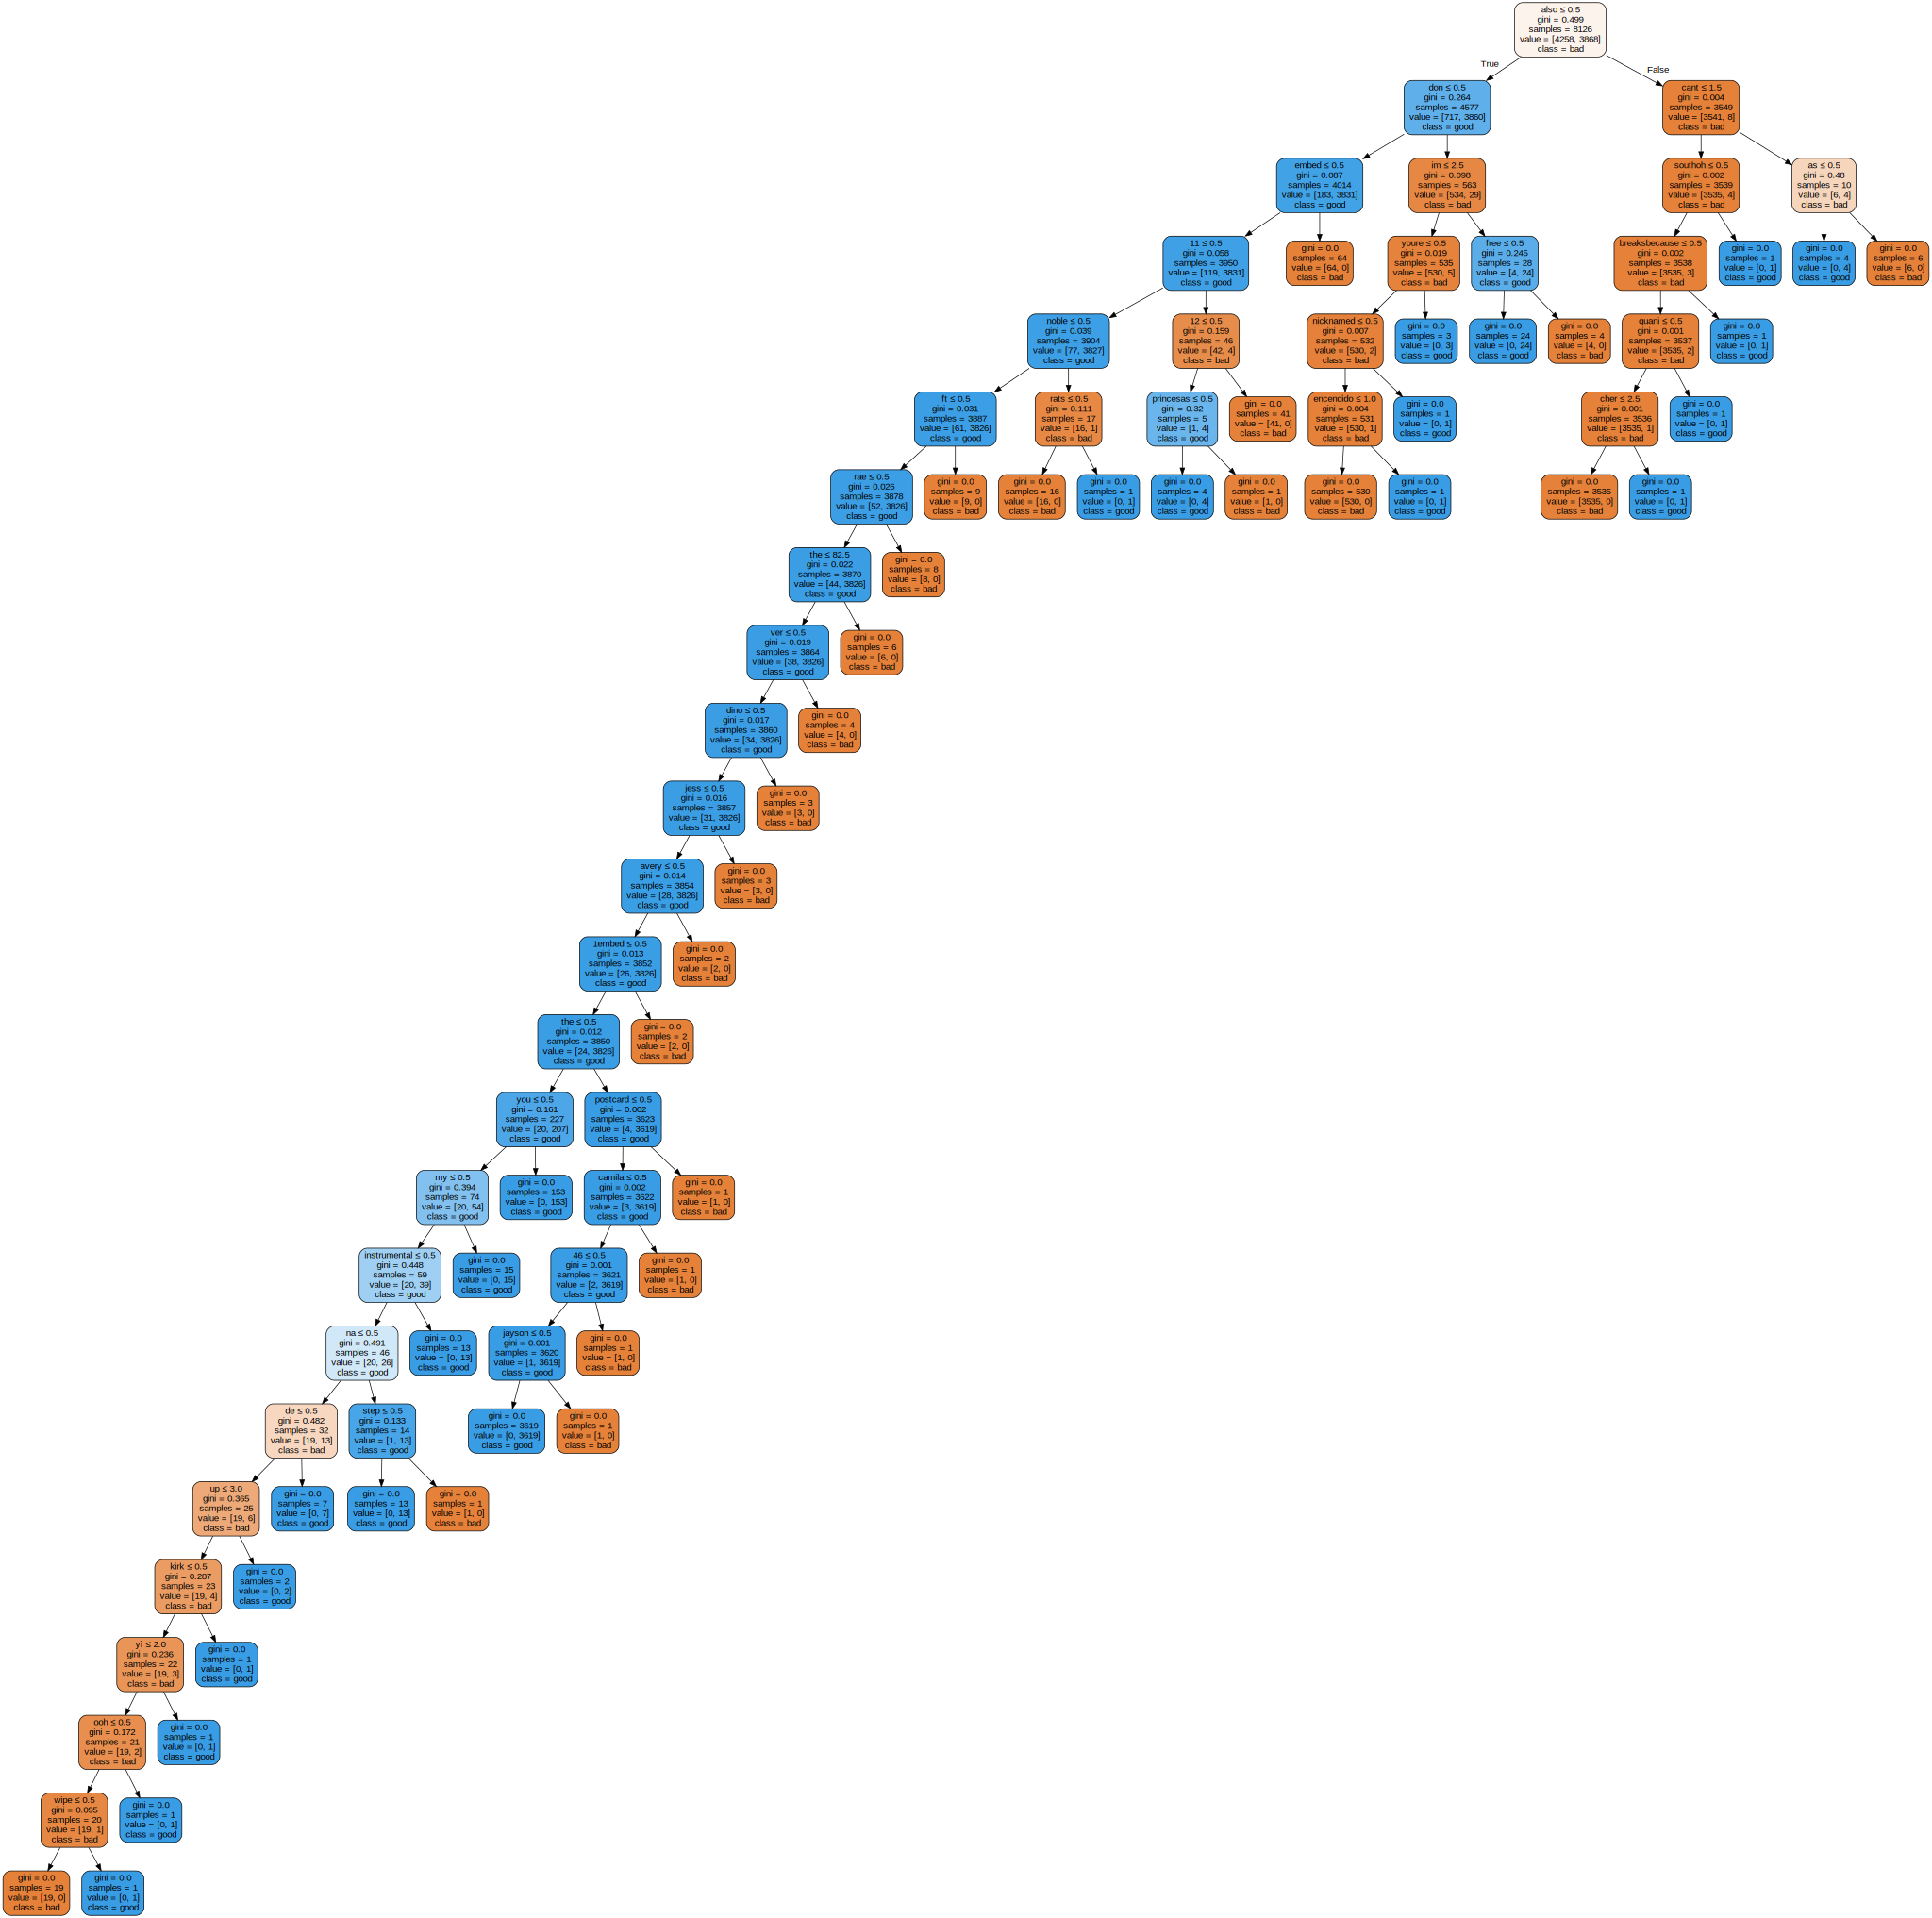

In [7]:
import graphviz
from sklearn.tree import export_graphviz

# Export the decision tree as a DOT file
dot_data = export_graphviz(tree, out_file=None, feature_names=vect.get_feature_names(), class_names=['bad', 'good'], filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)

# Set the output format and adjust the size
graph.format = 'png'  # Specify the desired output format (e.g., 'png', 'pdf', 'svg', etc.)
graph.render("decision_tree", view=False, format=graph.format, cleanup=True)  # Render the tree with the specified format and adjust the size

# Display the decision tree
graph